In [1]:
import sys
sys.path.append("../..")
import numpy as np
import pandas as pd
from src.data_loaders.rollcall import get_individual_votes, get_trainig_data_v2

In [17]:
info_df = pd.read_csv("../data/house_senate_members.csv")
print(info_df.shape)
print(info_df.columns)
info_df.head()

(51044, 22)
Index(['congress', 'chamber', 'icpsr', 'state_icpsr', 'district_code',
       'state_abbrev', 'party_code', 'occupancy', 'last_means', 'bioname',
       'bioguide_id', 'born', 'died', 'nominate_dim1', 'nominate_dim2',
       'nominate_log_likelihood', 'nominate_geo_mean_probability',
       'nominate_number_of_votes', 'nominate_number_of_errors', 'conditional',
       'nokken_poole_dim1', 'nokken_poole_dim2'],
      dtype='object')


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.758,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.776,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3.0,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.880,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6.0,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.783,96.0,11.0,NaN,0.114,-0.779


In [18]:
ind_df = get_individual_votes()
ind_df.head()

Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/individual_votes_7.parquet


date bill_number  \
congress session chamber rollnumber icpsr                           
101      2.0     0       371        633.0  1990-01-24      hr2712   
                                    1077.0 1990-01-24      hr2712   
                                    1087.0 1990-01-24      hr2712   
                                    2009.0 1990-01-24      hr2712   
                                    2605.0 1990-01-24      hr2712   

                                            vote_passed  vote_type_amend  \
congress session chamber rollnumber icpsr                                  
101      2.0     0       371        633.0             1                0   
                                    1077.0            1                0   
                                    1087.0            1                0   
                                    2009.0            1                0   
                                    2605.0            1                0   

                                            vote_type_cloture  \
congress session chamber rollnumber icpsr                       
101      2.0     0       371        633.0                   0   
                                    1077.0                  0   
                                    1087.0                  0   
                                    2009.0                  0   
                                    2605.0                  0   

                                            vote_type_concur  \
congress session chamber rollnumber icpsr                      
101      2.0     0       371        633.0                  0   
                                    1077.0                 0   
                                    1087.0                 0   
                                    2009.0                 0   
                                    2605.0                 0   

                                            vote_type_conference  \
congress session chamber rollnumber icpsr                          
101      2.0     0       371        633.0                      0   
                                    1077.0                     0   
                                    1087.0                     0   
                                    2009.0                     0   
                                    2605.0                     0   

                                            vote_type_pass  \
congress session chamber rollnumber icpsr                    
101      2.0     0       371        633.0                0   
                                    1077.0               0   
                                    1087.0               0   
                                    2009.0               0   
                                    2605.0               0   

                                            vote_type_recommit  \
congress session chamber rollnumber icpsr                        
101      2.0     0       371        633.0                    0   
                                    1077.0                   0   
                                    1087.0                   0   
                                    2009.0                   0   
                                    2605.0                   0   

                                            vote_type_suspend  ...  \
congress session chamber rollnumber icpsr                      ...   
101      2.0     0       371        633.0                   0  ...   
                                    1077.0                  0  ...   
                                    1087.0                  0  ...   
                                    2009.0                  0  ...   
                                    2605.0                  0  ...   

                                            crs_policy_area_native_americans  \
congress session chamber rollnumber icpsr                                      
101      2.0     0       371        633.0                                  0   
                     

In [19]:
icpsr = info_df.groupby("icpsr")["chamber"].nunique().idxmax()
info_df.query(f"icpsr == {icpsr}") # NOTE: a politician can change houses, parties, etc. 

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
1316,9,Senate,20,51,0.0,KY,13,2.0,3.0,"ADAIR, John",...,1840.0,-0.251,-0.051,-52.54462,0.398,57.0,22.0,NaN,0.134,-0.780
4292,22,House,20,51,7.0,KY,555,0.0,1.0,"ADAIR, John",...,1840.0,-0.251,-0.051,-78.62762,0.646,180.0,43.0,NaN,-0.275,0.033


In [20]:
idx = info_df.groupby(["icpsr", "congress"])["chamber"].nunique().idxmax()
idx
info_df.query(f"icpsr == {idx[0]}").head(3) # NOTE: a politician can change houses, parties, etc. IN THE SAME CONGRESS

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
12112,46,House,71,5,1.0,RI,200,0.0,1.0,"ALDRICH, Nelson Wilmarth",...,1915.0,0.401,-0.811,-50.79266,0.819,255.0,20.0,NaN,0.427,-0.665
12502,47,House,71,5,1.0,RI,200,1.0,1.0,"ALDRICH, Nelson Wilmarth",...,1915.0,0.401,-0.811,-86.65670,0.849,530.0,36.0,NaN,NaN,NaN
12620,47,Senate,71,5,0.0,RI,200,2.0,3.0,"ALDRICH, Nelson Wilmarth",...,1915.0,0.401,-0.811,NaN,NaN,NaN,NaN,NaN,0.348,-0.819


In [21]:
# for now let's just join in the party
print(ind_df.shape)
ind_df = ind_df.join(info_df.set_index(["congress", "icpsr"])[["party_code"]])

(2812636, 45)


<Axes: xlabel='party_code'>

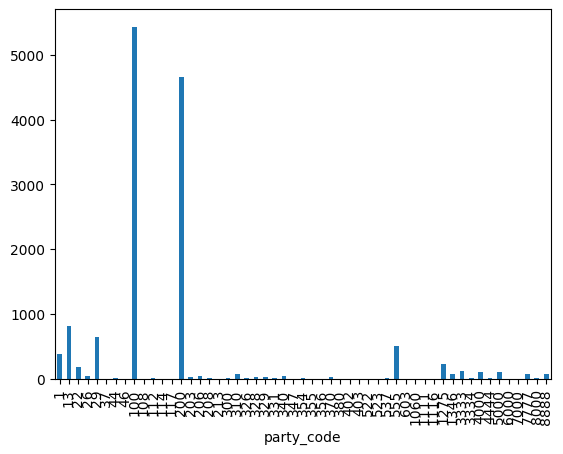

In [22]:
info_df.groupby("party_code")["icpsr"].nunique().plot.bar()

<Axes: xlabel='congress'>

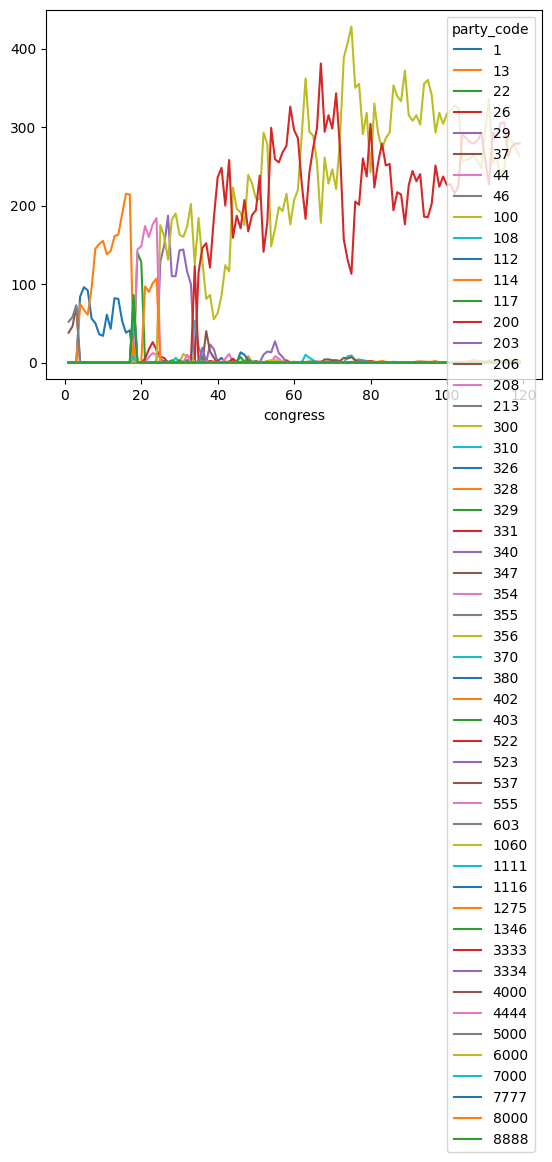

In [23]:
info_df.groupby("congress")["party_code"].value_counts().unstack("party_code").fillna(0).plot()

<Axes: xlabel='congress'>

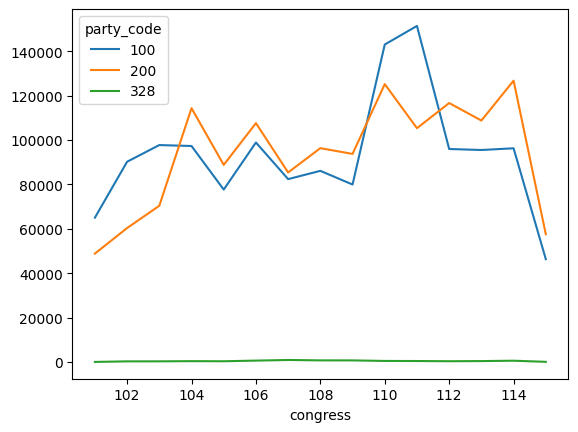

In [ ]:
ind_df.groupby("congress")["party_code"].value_counts().unstack("party_code").fillna(0).plot() # TODO: probably should just classify Bernie and Manchin as Dems

In [ ]:
df = get_trainig_data_v2()

Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/individual_votes_with_party_7.csv


In [4]:
df[-1].head()

,vote_for,icpsr,congress,chamber,session,d,r,vote_type_amend,vote_type_cloture,vote_type_concur,...,crs_policy_area_law,crs_policy_area_native_americans,crs_policy_area_public_lands_and_natural_resources,crs_policy_area_science_technology_communications,crs_policy_area_social_sciences_and_history,crs_policy_area_social_welfare,crs_policy_area_sports_and_recreation,crs_policy_area_taxation,crs_policy_area_transportation_and_public_works,crs_policy_area_water_resources_development
0,1,633.0,101,0,2.0,True,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1077.0,101,0,2.0,True,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1087.0,101,0,2.0,False,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2009.0,101,0,2.0,False,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2605.0,101,0,2.0,True,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
